<a href="https://www.kaggle.com/code/nishankavinda/aqualume-restaurant?scriptVersionId=252410815" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Aqualume Restuarant

## Initial Cost Plan

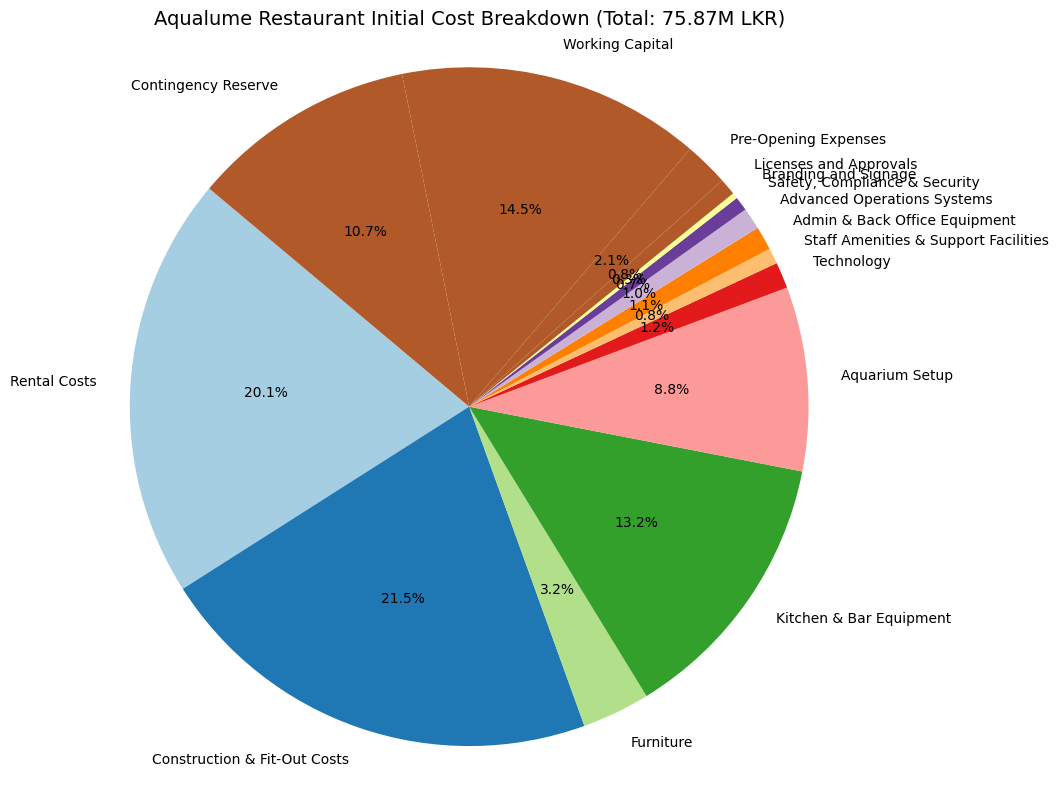

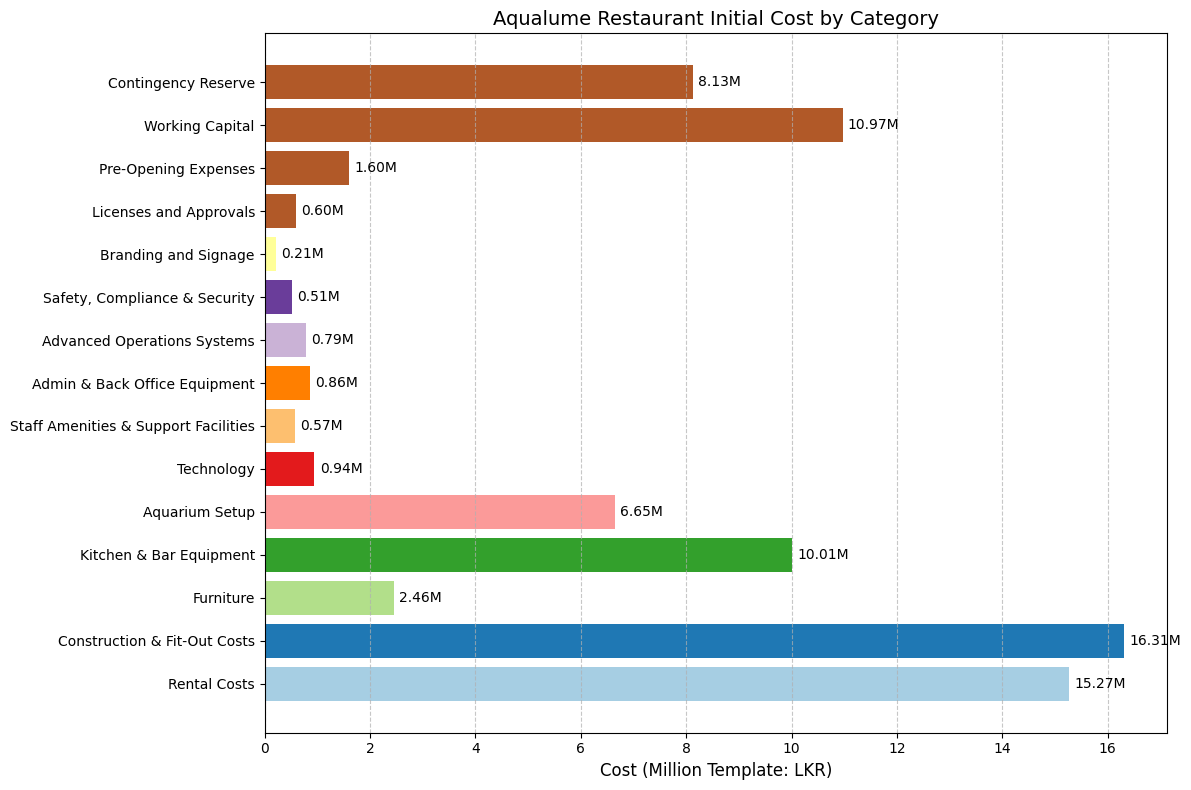

In [2]:
import matplotlib.pyplot as plt

# Data from the provided table (category names and total amounts in LKR)
categories = [
    "Rental Costs", "Construction & Fit-Out Costs", "Furniture", 
    "Kitchen & Bar Equipment", "Aquarium Setup", "Technology", 
    "Staff Amenities & Support Facilities", "Admin & Back Office Equipment", 
    "Advanced Operations Systems", "Safety, Compliance & Security", 
    "Branding and Signage", "Licenses and Approvals", 
    "Pre-Opening Expenses", "Working Capital", "Contingency Reserve"
]
totals = [
    15272575, 16310000, 2457000, 10006894, 6650000, 
    945000, 570000, 856500, 785000, 512500, 
    210000, 601000, 1600000, 10966690, 8131579
]

# Convert totals to millions for better readability
totals_millions = [total / 1_000_000 for total in totals]
grand_total = sum(totals) / 1_000_000  # Grand total in millions

# Plot 1: Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(totals_millions, labels=categories, autopct='%1.1f%%', startangle=140, 
        textprops={'fontsize': 10}, colors=plt.cm.Paired(range(len(categories))))
plt.title(f'Aqualume Restaurant Initial Cost Breakdown (Total: {grand_total:.2f}M LKR)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.tight_layout()

# Save the pie chart
plt.savefig('cost_breakdown_pie.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Plot 2: Bar Chart
plt.figure(figsize=(12, 8))
bars = plt.barh(categories, totals_millions, color=plt.cm.Paired(range(len(categories))))
plt.xlabel('Cost (Million Template: LKR)', fontsize=12)
plt.title('Aqualume Restaurant Initial Cost by Category', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}M', 
             va='center', ha='left', fontsize=10)

plt.tight_layout()

# Save the bar chart
plt.savefig('cost_breakdown_bar.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Sales Forecast

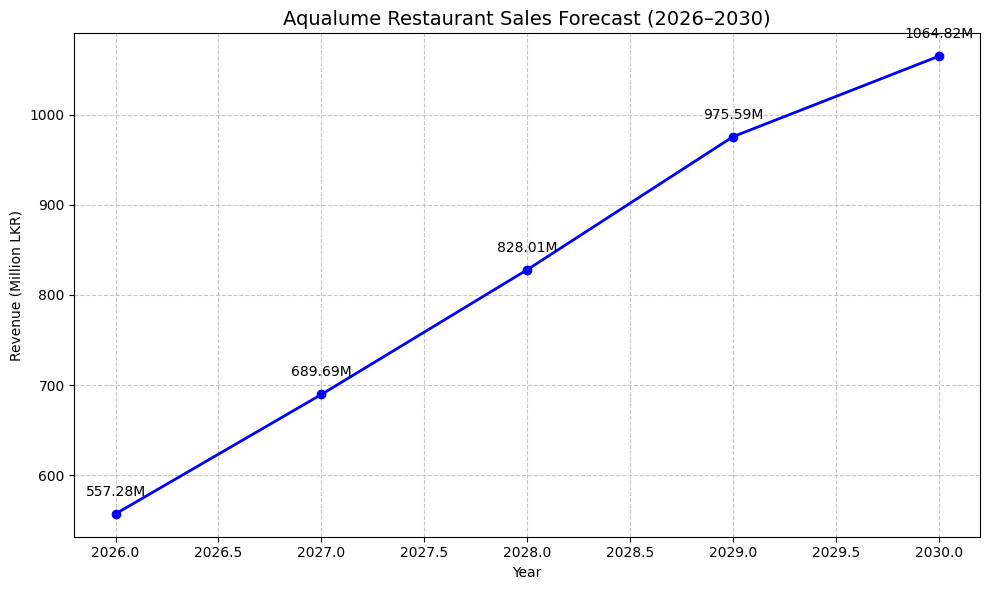

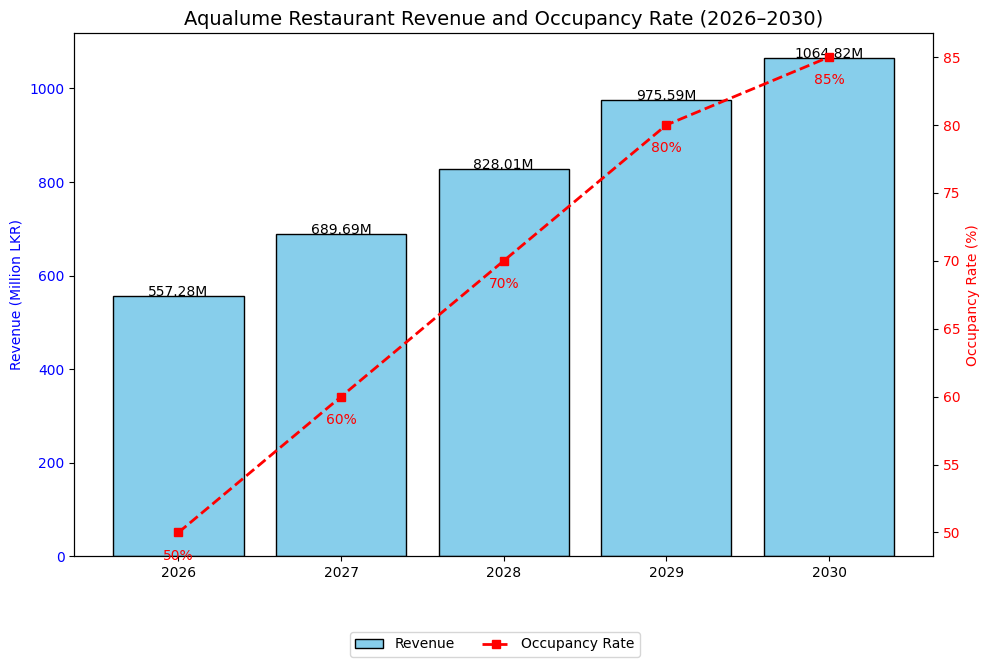

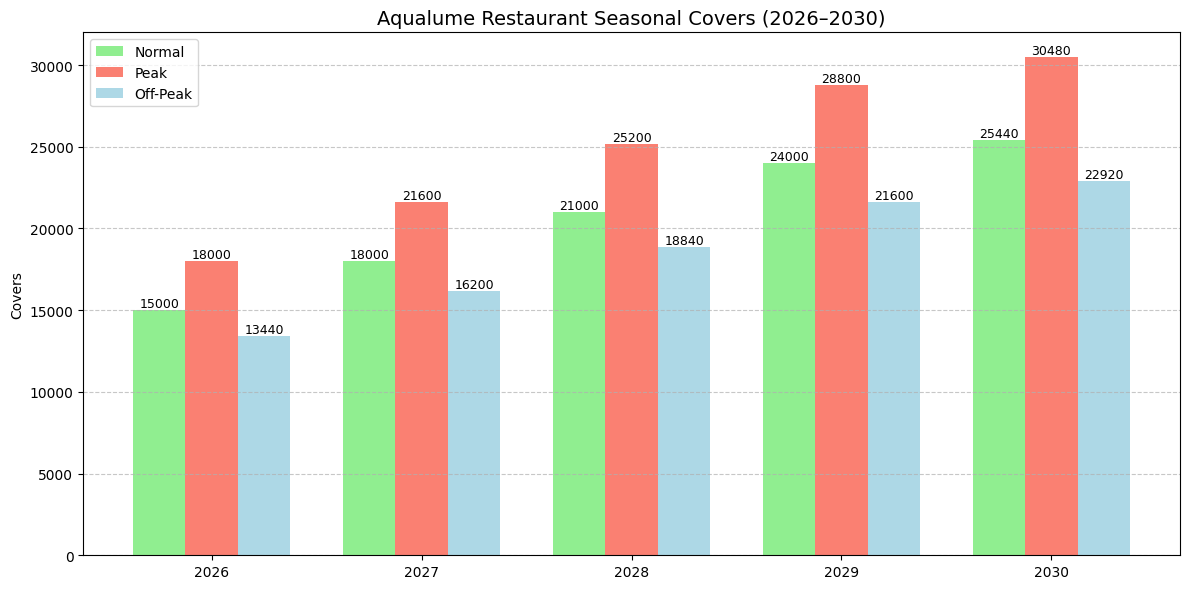

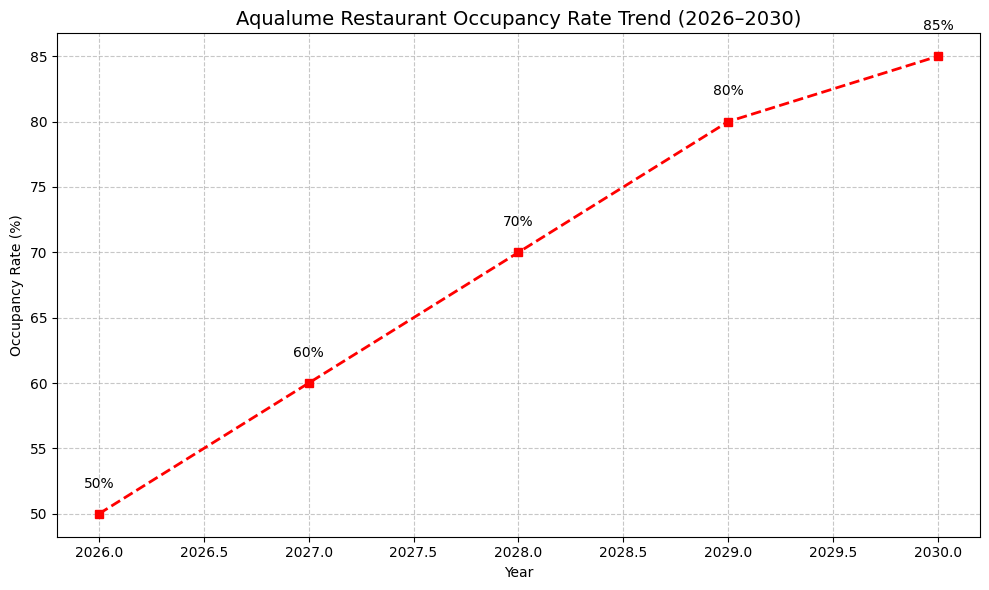

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = [2026, 2027, 2028, 2029, 2030]
revenues = [557280000, 689688000, 828011232, 975586368, 1064821524]  # LKR
occupancy_rates = [50, 60, 70, 80, 85]
covers_per_year = [46440, 55800, 65040, 74400, 78840]
seasonal_covers = {
    2026: {'normal': 15000, 'peak': 18000, 'off-peak': 13440},
    2027: {'normal': 18000, 'peak': 21600, 'off-peak': 16200},
    2028: {'normal': 21000, 'peak': 25200, 'off-peak': 18840},
    2029: {'normal': 24000, 'peak': 28800, 'off-peak': 21600},
    2030: {'normal': 25440, 'peak': 30480, 'off-peak': 22920}
}
revenues_millions = [rev / 1_000_000 for rev in revenues]

# --- Plot 1: Line Chart for Annual Revenue ---
plt.figure(figsize=(10, 6))
plt.plot(years, revenues_millions, marker='o', color='b', linewidth=2)
plt.title('Aqualume Restaurant Sales Forecast (2026–2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Revenue (Million LKR)')
plt.grid(True, linestyle='--', alpha=0.7)
for year, rev in zip(years, revenues_millions):
    plt.text(year, rev + 20, f'{rev:.2f}M', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('sales_forecast_line.png', dpi=300)
plt.show()
plt.close()

# --- Plot 2: Bar Chart + Occupancy Line ---
fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(years, revenues_millions, color='skyblue', edgecolor='black')
ax1.set_ylabel('Revenue (Million LKR)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}M', ha='center', fontsize=10)

ax2 = ax1.twinx()
ax2.plot(years, occupancy_rates, marker='s', linestyle='--', color='red', linewidth=2)
ax2.set_ylabel('Occupancy Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
for year, occ in zip(years, occupancy_rates):
    ax2.text(year, occ - 2, f'{occ}%', ha='center', fontsize=10, color='red')

plt.title('Aqualume Restaurant Revenue and Occupancy Rate (2026–2030)', fontsize=14)
fig.legend(['Revenue', 'Occupancy Rate'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.savefig('revenue_occupancy_bar.png', dpi=300)
plt.show()
plt.close()

# --- Plot 3: Grouped Bar Chart for Seasonal Covers ---
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(years))
normal = [seasonal_covers[year]['normal'] for year in years]
peak = [seasonal_covers[year]['peak'] for year in years]
offpeak = [seasonal_covers[year]['off-peak'] for year in years]

bars1 = ax.bar(index - bar_width, normal, bar_width, label='Normal', color='lightgreen')
bars2 = ax.bar(index, peak, bar_width, label='Peak', color='salmon')
bars3 = ax.bar(index + bar_width, offpeak, bar_width, label='Off-Peak', color='lightblue')
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.set_ylabel('Covers')
ax.set_title('Aqualume Restaurant Seasonal Covers (2026–2030)', fontsize=14)
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=9)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
plt.tight_layout()
plt.savefig('seasonal_covers_bar.png', dpi=300)
plt.show()
plt.close()

# --- Plot 4: Line Chart for Occupancy Rate Trend ---
plt.figure(figsize=(10, 6))
plt.plot(years, occupancy_rates, marker='s', linestyle='--', color='red', linewidth=2)
plt.title('Aqualume Restaurant Occupancy Rate Trend (2026–2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Occupancy Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)
for year, occ in zip(years, occupancy_rates):
    plt.text(year, occ + 2, f'{occ}%', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('occupancy_rate_line.png', dpi=300)
plt.show()
plt.close()


## P & L

Saved: revenue_profit_line.png


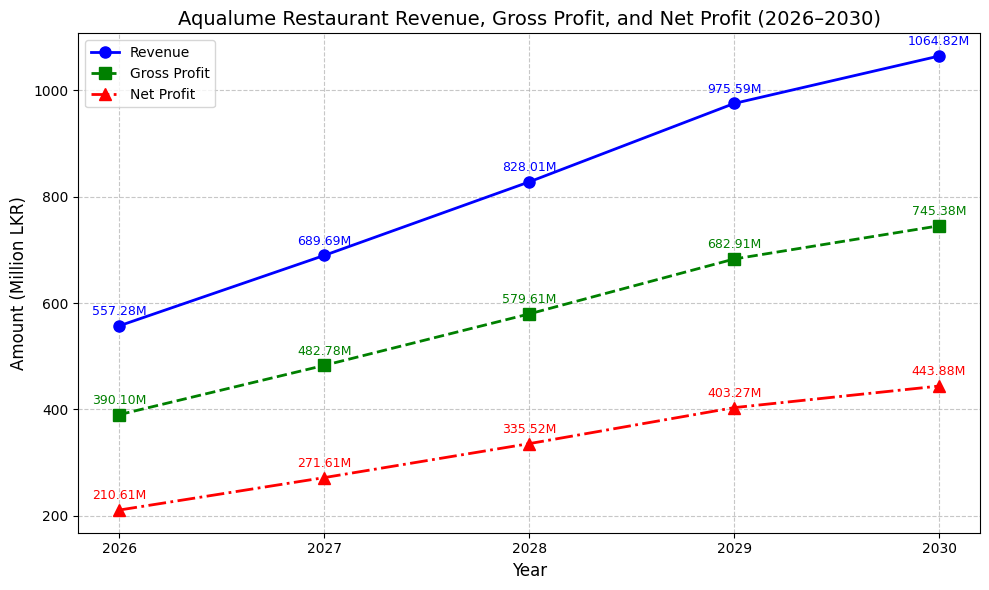

Saved: expense_breakdown_stacked_bar.png


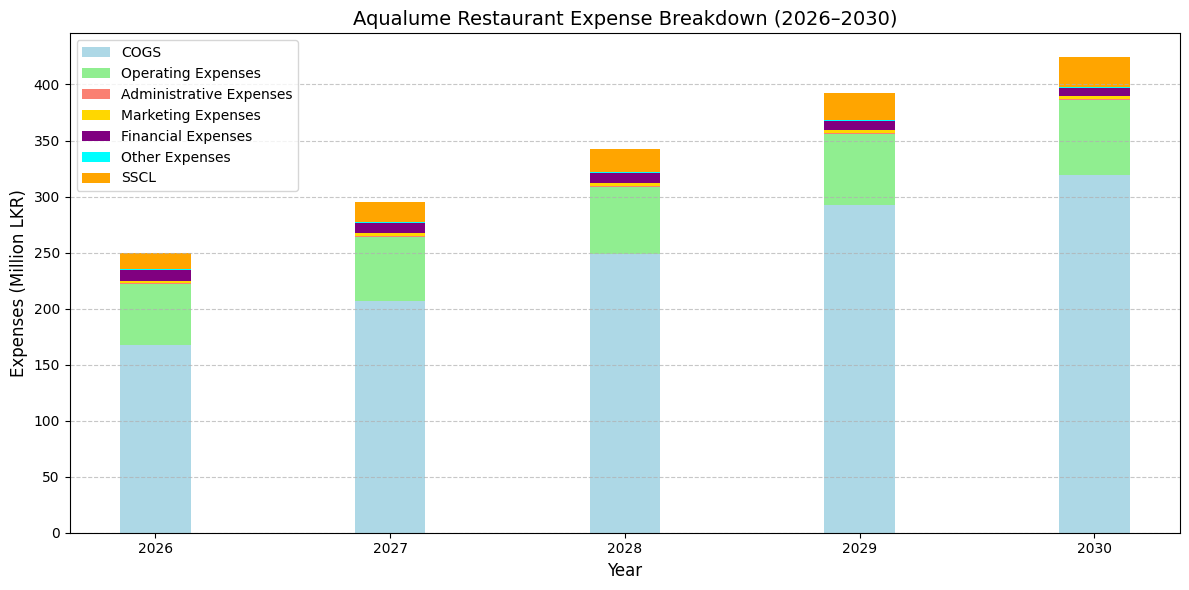

Saved: ebitda_ebit_profit_bar.png


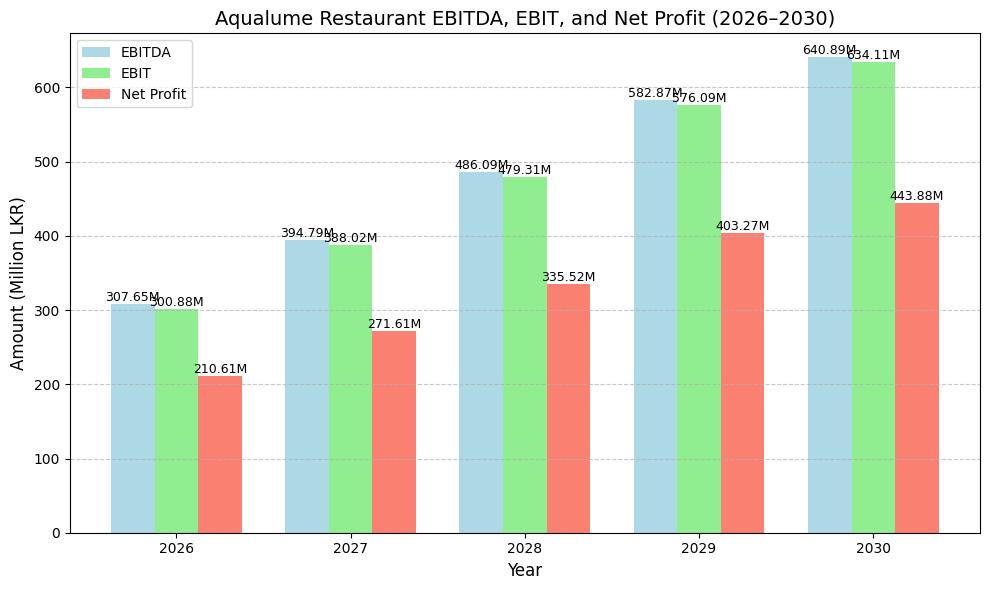

Saved: operating_expenses_breakdown_area.png


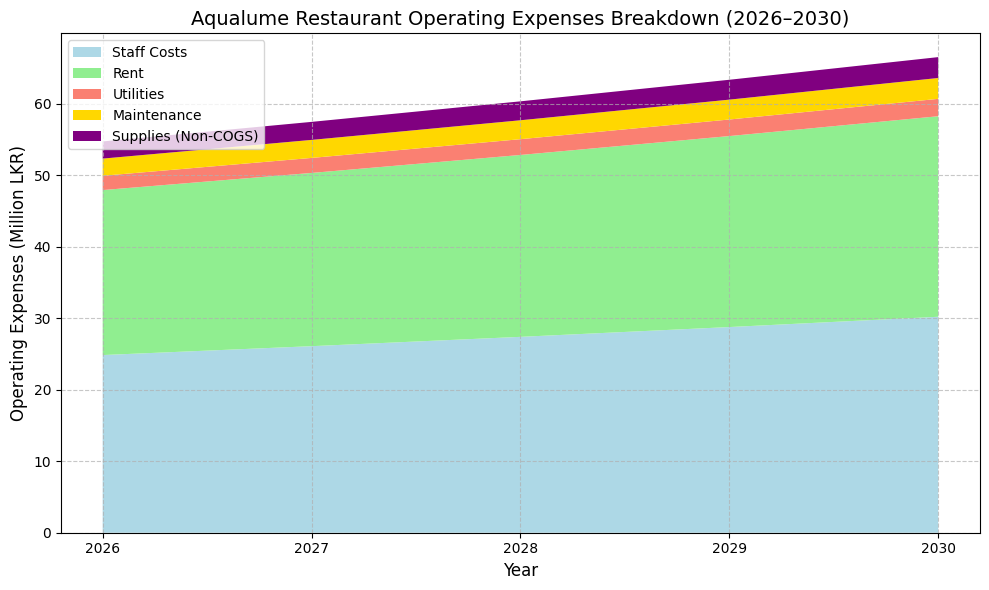

In [4]:
import matplotlib.pyplot as plt
import numpy as numpy  # Use full name to avoid conflicts
import os

# Data from the P&L statements
years = [2026, 2027, 2028, 2029, 2030]
revenue = [557280000, 689688000, 828011232, 975586368, 1064821524]  # Revenue in LKR
gross_profit = [390096000, 482781600, 579607862, 682910458, 745375067]  # Gross Profit
net_profit = [210614215, 271612176, 335517394, 403266485, 443877308]  # Net Profit
ebitda = [307653766, 394793710, 486086879, 582871294, 640886756]  # EBITDA
ebit = [300877450, 388017394, 479310563, 576094978, 634110440]  # EBIT
cogs = [167184000, 206906400, 248403370, 292675910, 319446457]  # COGS
operating_expenses = [54706760, 57442098, 60314203, 63329913, 66496408]  # Operating Expenses
administrative_expenses = [635000, 666750, 700088, 735092, 771846]  # Administrative Expenses
marketing_expenses = [2200000, 2310000, 2425500, 2546775, 2674114]  # Marketing Expenses
financial_expenses = [10164474, 9486842, 8809211, 8131579, 7453948]  # Financial Expenses (including principal repayment)
other_expenses = [800000, 840000, 882000, 926101, 972405]  # Other Expenses
sscl = [13932000, 17242200, 20700281, 24389659, 26620538]  # Social Security Contribution Levy
operating_expenses_breakdown = {
    'staff_costs': [24840000, 26082000, 27386100, 28755405, 30193175],  # Staff Salaries + EPF + ETF
    'rent': [23066760, 24220098, 25431103, 26702658, 28037791],
    'utilities': [2000000, 2100000, 2205000, 2315250, 2431013],
    'maintenance': [2400000, 2520000, 2646000, 2778300, 2917215],
    'supplies': [2400000, 2520000, 2646000, 2778300, 2917215]
}

# Convert to millions for readability
revenue_millions = [val / 1_000_000 for val in revenue]
gross_profit_millions = [val / 1_000_000 for val in gross_profit]
net_profit_millions = [val / 1_000_000 for val in net_profit]
ebitda_millions = [val / 1_000_000 for val in ebitda]
ebit_millions = [val / 1_000_000 for val in ebit]
cogs_millions = [val / 1_000_000 for val in cogs]
operating_expenses_millions = [val / 1_000_000 for val in operating_expenses]
administrative_expenses_millions = [val / 1_000_000 for val in administrative_expenses]
marketing_expenses_millions = [val / 1_000_000 for val in marketing_expenses]
financial_expenses_millions = [val / 1_000_000 for val in financial_expenses]
other_expenses_millions = [val / 1_000_000 for val in other_expenses]
sscl_millions = [val / 1_000_000 for val in sscl]
operating_expenses_breakdown_millions = {
    key: [val / 1_000_000 for val in values]
    for key, values in operating_expenses_breakdown.items()
}

# Ensure output directory exists
output_dir = "P&L"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot 1: Line Chart for Revenue, Gross Profit, and Net Profit Trends
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, revenue_millions, marker='o', linestyle='-', color='b', linewidth=2, markersize=8, label='Revenue')
ax.plot(years, gross_profit_millions, marker='s', linestyle='--', color='g', linewidth=2, markersize=8, label='Gross Profit')
ax.plot(years, net_profit_millions, marker='^', linestyle='-.', color='r', linewidth=2, markersize=8, label='Net Profit')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Amount (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant Revenue, Gross Profit, and Net Profit (2026–2030)', fontsize=14)
ax.set_xticks(years)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()
for i, (year, rev, gp, np) in enumerate(zip(years, revenue_millions, gross_profit_millions, net_profit_millions)):
    ax.text(year, rev + 20, f'{rev:.2f}M', ha='center', fontsize=9, color='b')
    ax.text(year, gp + 20, f'{gp:.2f}M', ha='center', fontsize=9, color='g')
    ax.text(year, np + 20, f'{np:.2f}M', ha='center', fontsize=9, color='r')
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'revenue_profit_line.png'), dpi=300, bbox_inches='tight')
    print("Saved: revenue_profit_line.png")
except Exception as e:
    print(f"Error saving revenue_profit_line.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 2: Stacked Bar Chart for Expense Breakdown
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.3
index = numpy.arange(len(years))  # Use numpy explicitly
ax.bar(index, cogs_millions, bar_width, label='COGS', color='lightblue')
ax.bar(index, operating_expenses_millions, bar_width, bottom=cogs_millions, label='Operating Expenses', color='lightgreen')
ax.bar(index, administrative_expenses_millions, bar_width, 
       bottom=[c + op for c, op in zip(cogs_millions, operating_expenses_millions)], 
       label='Administrative Expenses', color='salmon')
ax.bar(index, marketing_expenses_millions, bar_width, 
       bottom=[c + op + adm for c, op, adm in zip(cogs_millions, operating_expenses_millions, administrative_expenses_millions)], 
       label='Marketing Expenses', color='gold')
ax.bar(index, financial_expenses_millions, bar_width, 
       bottom=[c + op + adm + mkt for c, op, adm, mkt in zip(cogs_millions, operating_expenses_millions, administrative_expenses_millions, marketing_expenses_millions)], 
       label='Financial Expenses', color='purple')
ax.bar(index, other_expenses_millions, bar_width, 
       bottom=[c + op + adm + mkt + fin for c, op, adm, mkt, fin in zip(cogs_millions, operating_expenses_millions, administrative_expenses_millions, marketing_expenses_millions, financial_expenses_millions)], 
       label='Other Expenses', color='cyan')
ax.bar(index, sscl_millions, bar_width, 
       bottom=[c + op + adm + mkt + fin + oth for c, op, adm, mkt, fin, oth in zip(cogs_millions, operating_expenses_millions, administrative_expenses_millions, marketing_expenses_millions, financial_expenses_millions, other_expenses_millions)], 
       label='SSCL', color='orange')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Expenses (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant Expense Breakdown (2026–2030)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'expense_breakdown_stacked_bar.png'), dpi=300, bbox_inches='tight')
    print("Saved: expense_breakdown_stacked_bar.png")
except Exception as e:
    print(f"Error saving expense_breakdown_stacked_bar.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 3: Bar Chart for EBITDA, EBIT, and Net Profit
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = numpy.arange(len(years))  # Use numpy explicitly
bars1 = ax.bar(index - bar_width, ebitda_millions, bar_width, label='EBITDA', color='lightblue')
bars2 = ax.bar(index, ebit_millions, bar_width, label='EBIT', color='lightgreen')
bars3 = ax.bar(index + bar_width, net_profit_millions, bar_width, label='Net Profit', color='salmon')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Amount (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant EBITDA, EBIT, and Net Profit (2026–2030)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}M', 
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'ebitda_ebit_profit_bar.png'), dpi=300, bbox_inches='tight')
    print("Saved: ebitda_ebit_profit_bar.png")
except Exception as e:
    print(f"Error saving ebitda_ebit_profit_bar.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 4: Area Chart for Operating Expenses Breakdown
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(years, 
             operating_expenses_breakdown_millions['staff_costs'],
             operating_expenses_breakdown_millions['rent'],
             operating_expenses_breakdown_millions['utilities'],
             operating_expenses_breakdown_millions['maintenance'],
             operating_expenses_breakdown_millions['supplies'],
             labels=['Staff Costs', 'Rent', 'Utilities', 'Maintenance', 'Supplies (Non-COGS)'],
             colors=['lightblue', 'lightgreen', 'salmon', 'gold', 'purple'])
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Operating Expenses (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant Operating Expenses Breakdown (2026–2030)', fontsize=14)
ax.set_xticks(years)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left')
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'operating_expenses_breakdown_area.png'), dpi=300, bbox_inches='tight')
    print("Saved: operating_expenses_breakdown_area.png")
except Exception as e:
    print(f"Error saving operating_expenses_breakdown_area.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

## Cash Flow 

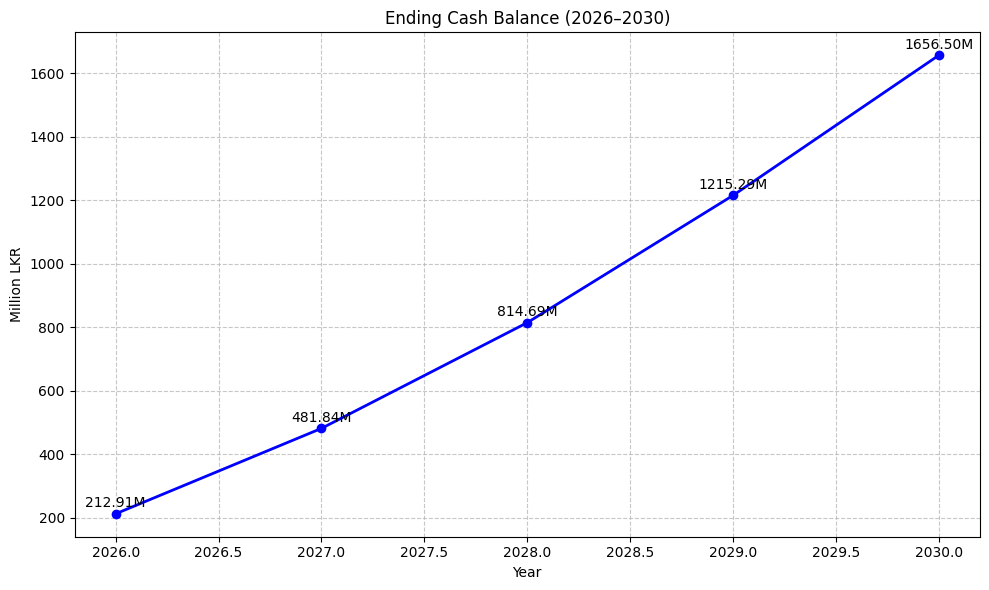

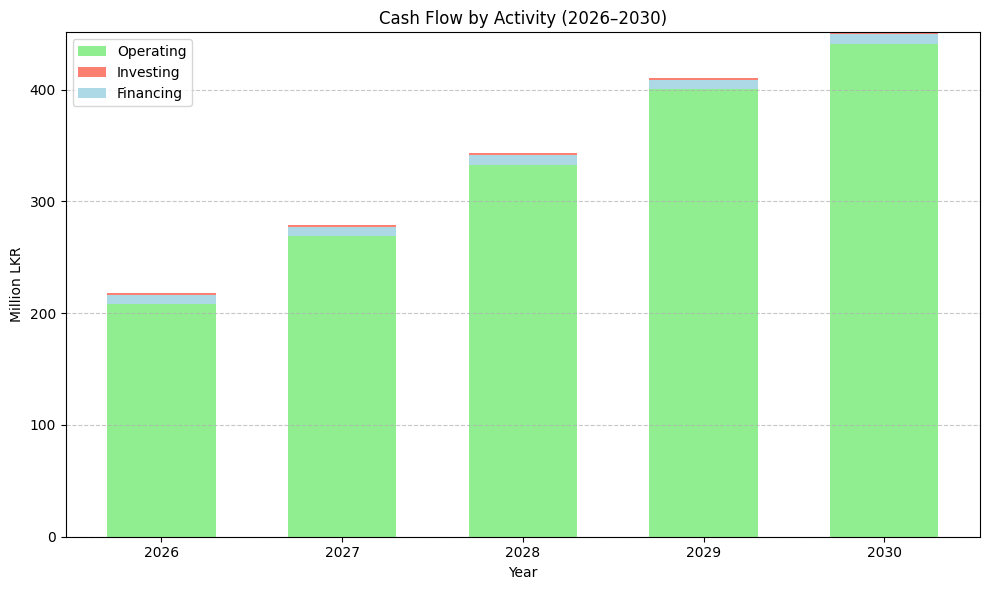

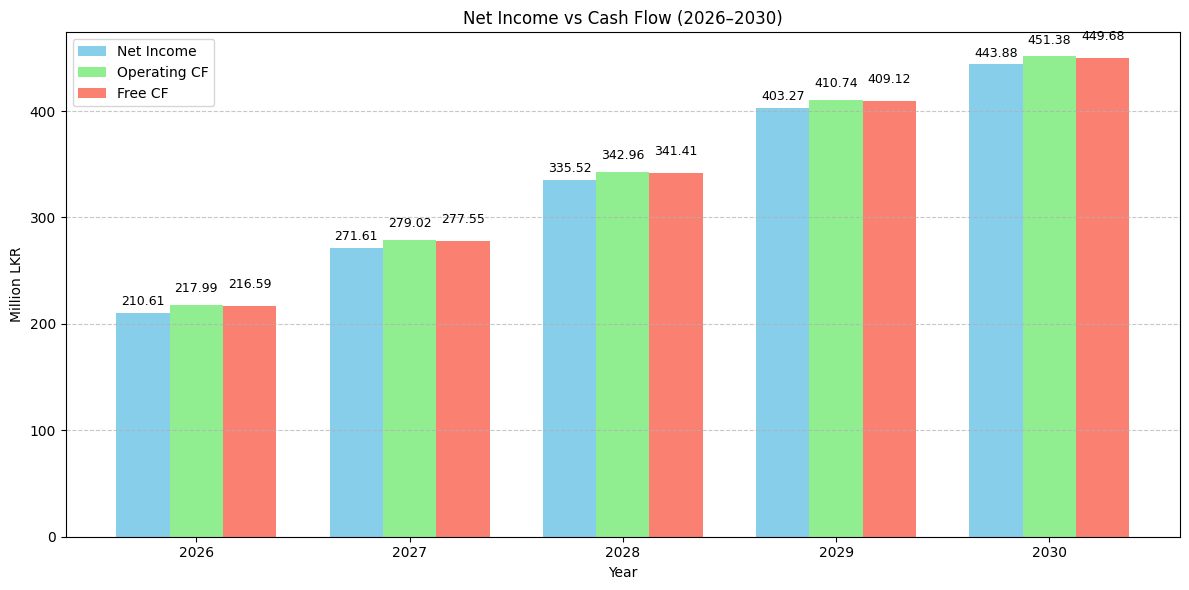

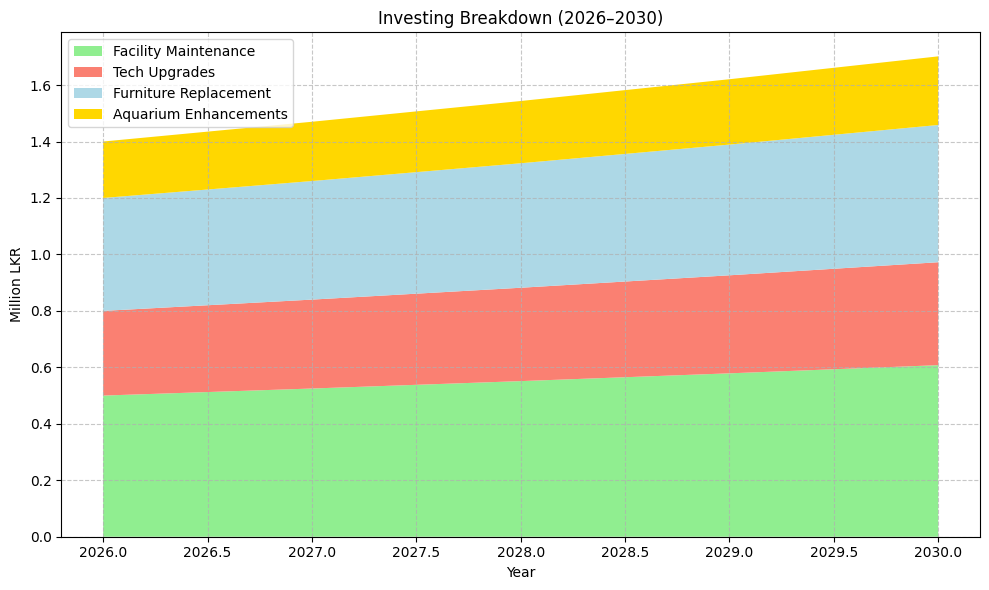

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Data (in LKR)
years = [2026, 2027, 2028, 2029, 2030]
ending_cash = [212_914_215, 481_841_391, 814_685_535, 1_215_287_106, 1_656_504_256]
net_income = [210_614_215, 271_612_176, 335_517_394, 403_266_485, 443_877_308]
operating_cf = [217_990_531, 279_018_492, 342_955_210, 410_737_376, 451_382_928]
free_cf = [216_590_531, 277_548_492, 341_411_710, 409_116_700, 449_681_219]
investing_cf = [-1_400_000, -1_470_000, -1_543_500, -1_620_676, -1_701_709]
financing_cf = [-8_676_316, -8_621_316, -8_567_566, -8_515_129, -8_464_069]

# Breakdown of investing (in LKR)
investing_breakdown = {
    'Facility Maintenance': [500_000, 525_000, 551_250, 578_813, 607_753],
    'Tech Upgrades': [300_000, 315_000, 330_750, 347_288, 364_652],
    'Furniture Replacement': [400_000, 420_000, 441_000, 463_050, 486_203],
    'Aquarium Enhancements': [200_000, 210_000, 220_500, 231_525, 243_101]
}

# Convert to millions
def to_millions(lst): return [x / 1e6 for x in lst]

ending_cash_m = to_millions(ending_cash)
net_income_m = to_millions(net_income)
operating_cf_m = to_millions(operating_cf)
free_cf_m = to_millions(free_cf)
investing_cf_m = to_millions(investing_cf)
financing_cf_m = to_millions(financing_cf)
investing_breakdown_m = {k: to_millions(v) for k, v in investing_breakdown.items()}

# Ensure directory
os.makedirs("cash_flow", exist_ok=True)

# Plot 1: Line Chart – Ending Cash Balance
plt.figure(figsize=(10, 6))
plt.plot(years, ending_cash_m, marker='o', color='b', linewidth=2)
plt.title("Ending Cash Balance (2026–2030)")
plt.xlabel("Year"); plt.ylabel("Million LKR")
plt.grid(True, linestyle='--', alpha=0.7)
for x, y in zip(years, ending_cash_m):
    plt.text(x, y + 20, f'{y:.2f}M', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig("cash_flow/cash_balance_line.png", dpi=300)
plt.show(); plt.close()

# Plot 2: Stacked Bar Chart – Cash Flow by Activity
bar_width = 0.6
index = np.arange(len(years))
plt.figure(figsize=(10, 6))
plt.bar(index, operating_cf_m, bar_width, label='Operating', color='lightgreen')
plt.bar(index, investing_cf_m, bar_width, bottom=operating_cf_m, label='Investing', color='salmon')
bottom_sum = [op + inv for op, inv in zip(operating_cf_m, investing_cf_m)]
plt.bar(index, financing_cf_m, bar_width, bottom=bottom_sum, label='Financing', color='lightblue')
plt.xticks(index, years)
plt.title("Cash Flow by Activity (2026–2030)")
plt.xlabel("Year"); plt.ylabel("Million LKR")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("cash_flow/cash_flow_stacked_bar.png", dpi=300)
plt.show(); plt.close()

# Plot 3: Grouped Bar – Net Income vs Cash Flow
bar_width = 0.25
index = np.arange(len(years))
plt.figure(figsize=(12, 6))
bars1 = plt.bar(index - bar_width, net_income_m, bar_width, label='Net Income', color='skyblue')
bars2 = plt.bar(index, operating_cf_m, bar_width, label='Operating CF', color='lightgreen')
bars3 = plt.bar(index + bar_width, free_cf_m, bar_width, label='Free CF', color='salmon')

plt.xticks(index, years)
plt.title("Net Income vs Cash Flow (2026–2030)")
plt.xlabel("Year"); plt.ylabel("Million LKR")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate with small vertical shifts to prevent overlap
for bars, offset in zip([bars1, bars2, bars3], [4, 9, 14]):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + offset,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.legend(); plt.tight_layout()
plt.savefig("cash_flow/net_income_vs_cash_flow_bar.png", dpi=300)
plt.show(); plt.close()

# Plot 4: Area Chart – Investing Breakdown
plt.figure(figsize=(10, 6))
plt.stackplot(years, *investing_breakdown_m.values(), labels=investing_breakdown_m.keys(),
              colors=['lightgreen', 'salmon', 'lightblue', 'gold'])
plt.title("Investing Breakdown (2026–2030)")
plt.xlabel("Year"); plt.ylabel("Million LKR")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("cash_flow/investing_breakdown_area.png", dpi=300)
plt.show(); plt.close()


## Balance Sheet

Saved: liabilities_equity_stacked_bar.png


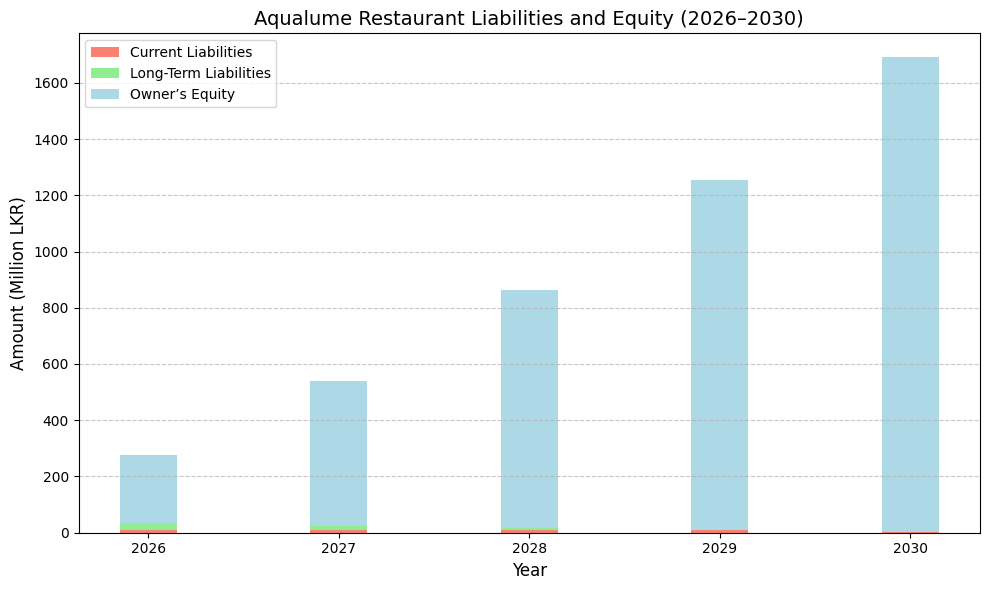

Saved: cash_retained_earnings_line.png


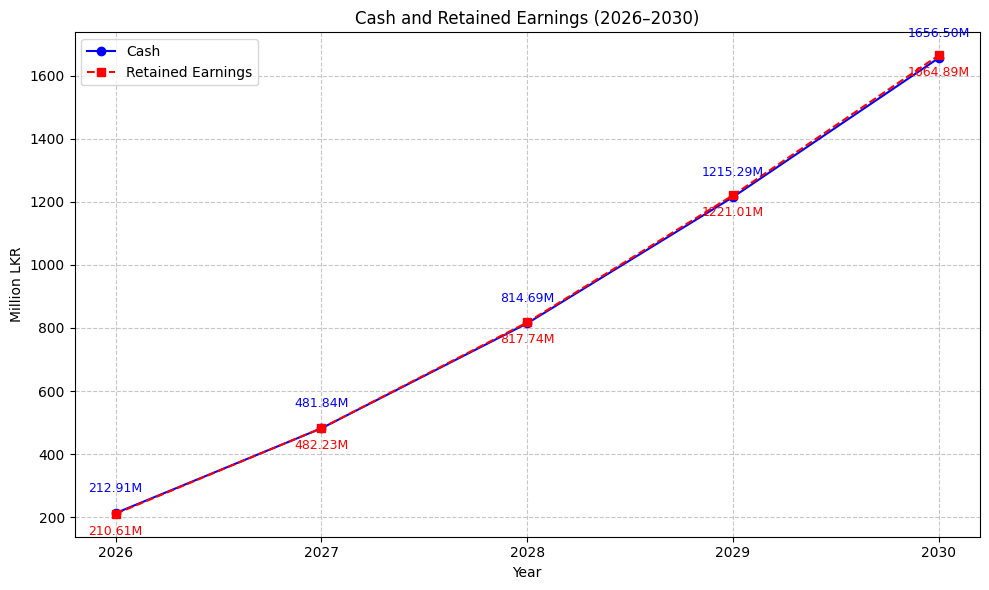

Saved: debt_breakdown_bar.png


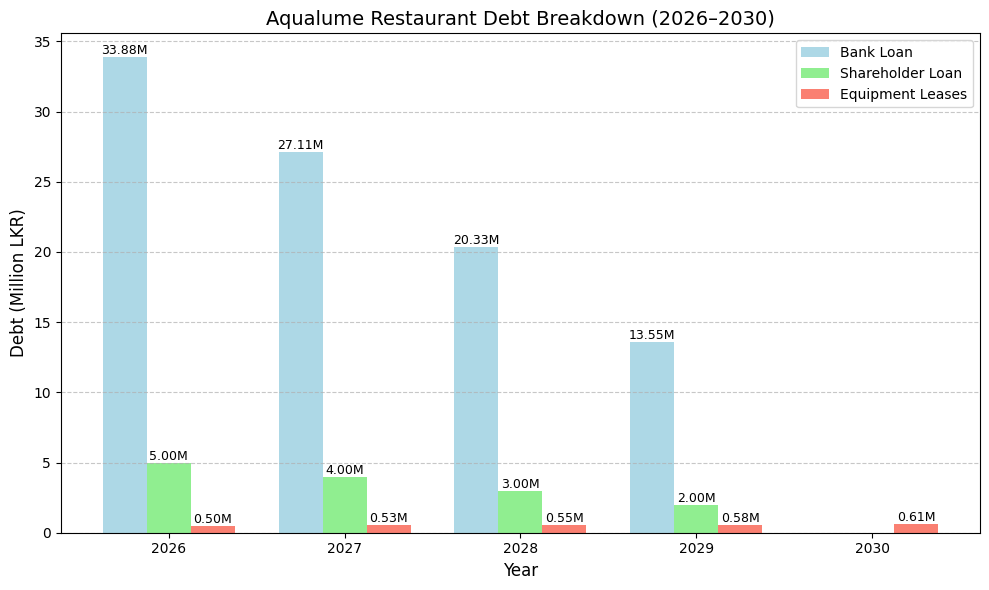

Saved: assets_vs_liabilities_equity_bar.png


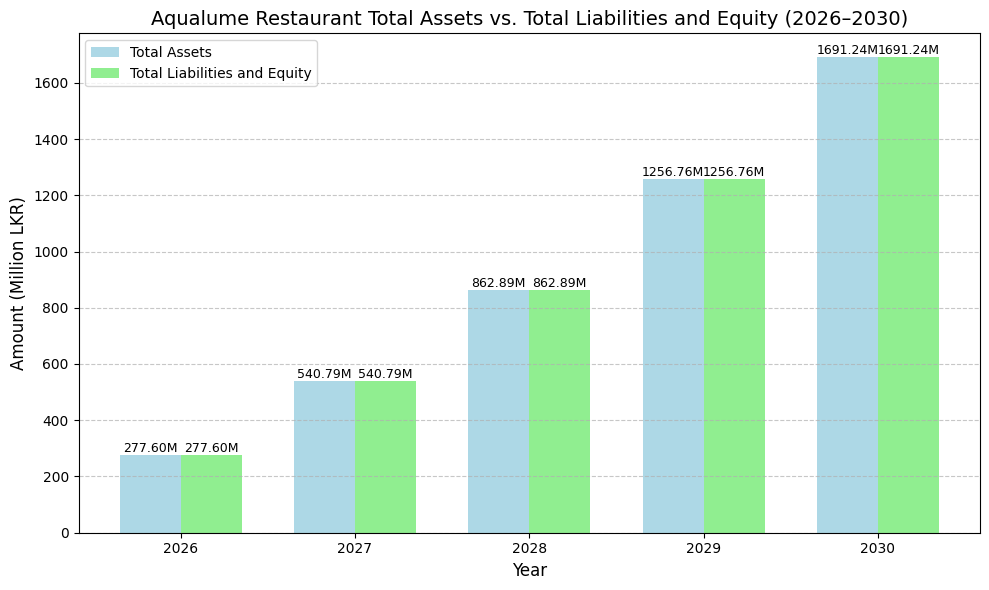

Saved: assets_breakdown_area.png


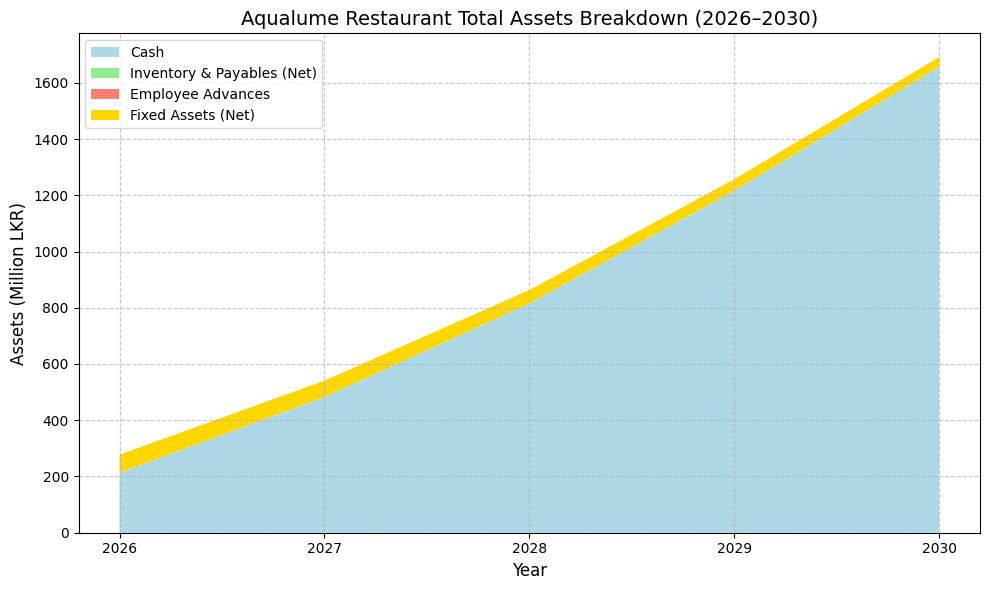

In [6]:
import matplotlib.pyplot as plt
import numpy as numpy
import os

# Data from the balance sheets (corrected for 2026 typo and retained earnings)
years = [2026, 2027, 2028, 2029, 2030]
total_assets = [277601058, 540786918, 862891496, 1256755339, 1691236689]  # Total Assets in LKR
total_liabilities_equity = [277601058, 540786918, 862891496, 1256755339, 1691236689]  # Total Liabilities and Equity (corrected 2026: 277601058 -> 274601058)
current_assets = [213614215, 482576391, 815457285, 1216097444, 1657355110]  # Total Current Assets
non_current_assets = [63986843, 58210527, 47434211, 40657895, 33881579]  # Total Non-Current Assets (Fixed Assets, Net)
cash = [212914215, 481841391, 814685535, 1215287106, 1656504256]  # Cash
inventory_payables_net = [500000, 525000, 551250, 578813, 607753]  # Inventory and Payables (Net)
employee_advances = [200000, 210000, 220500, 231525, 243101]  # Employee Advances
total_liabilities = [
    9576316 + 23329947,  # 2026: Current + Long-Term
    9666316 + 15552631,  # 2027
    9760816 + 7776315,   # 2028
    9859041 + 0,         # 2029
    2187911 + 0          # 2030
]
current_liabilities = [9576316, 9666316, 9760816, 9859041, 2187911]  # Total Current Liabilities
long_term_liabilities = [23329947, 15552631, 7776315, 0, 0]  # Total Long-Term Liabilities
equity = [244694795, 515567971, 845354365, 1245896298, 1689048778]  # Total Owner’s Equity
retained_earnings = [210614215, 482226391, 817744169, 1221010654, 1664887962]  # Retained Earnings (corrected 2026: 210813215 -> 210614215, and cumulative net income)
bank_loan = [27105263 + 6776316, 20328947 + 6776316, 13552631 + 6776316, 6776315 + 6776315, 0]  # Bank Loan (Long-Term + Current)
shareholder_loan = [4000000 + 1000000, 3000000 + 1000000, 2000000 + 1000000, 1000000 + 1000000, 0]  # Shareholder Loan (Long-Term + Current)
equipment_leases = [500000, 525000, 551250, 578813, 607753]  # Equipment Leases (Current)

# Convert to millions for readability
total_assets_millions = [val / 1_000_000 for val in total_assets]
total_liabilities_equity_millions = [val / 1_000_000 for val in total_liabilities_equity]
current_assets_millions = [val / 1_000_000 for val in current_assets]
non_current_assets_millions = [val / 1_000_000 for val in non_current_assets]
cash_millions = [val / 1_000_000 for val in cash]
inventory_payables_net_millions = [val / 1_000_000 for val in inventory_payables_net]
employee_advances_millions = [val / 1_000_000 for val in employee_advances]
total_liabilities_millions = [val / 1_000_000 for val in total_liabilities]
current_liabilities_millions = [val / 1_000_000 for val in current_liabilities]
long_term_liabilities_millions = [val / 1_000_000 for val in long_term_liabilities]
equity_millions = [val / 1_000_000 for val in equity]
retained_earnings_millions = [val / 1_000_000 for val in retained_earnings]
bank_loan_millions = [val / 1_000_000 for val in bank_loan]
shareholder_loan_millions = [val / 1_000_000 for val in shareholder_loan]
equipment_leases_millions = [val / 1_000_000 for val in equipment_leases]

# Ensure output directory exists
output_dir = "Balance_Sheet"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot 1: Stacked Bar Chart for Liabilities and Equity
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.3
index = numpy.arange(len(years))
ax.bar(index, current_liabilities_millions, bar_width, label='Current Liabilities', color='salmon')
ax.bar(index, long_term_liabilities_millions, bar_width, bottom=current_liabilities_millions, 
       label='Long-Term Liabilities', color='lightgreen')
ax.bar(index, equity_millions, bar_width, 
       bottom=[cl + ltl for cl, ltl in zip(current_liabilities_millions, long_term_liabilities_millions)], 
       label='Owner’s Equity', color='lightblue')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Amount (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant Liabilities and Equity (2026–2030)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'liabilities_equity_stacked_bar.png'), dpi=300, bbox_inches='tight')
    print("Saved: liabilities_equity_stacked_bar.png")
except Exception as e:
    print(f"Error saving liabilities_equity_stacked_bar.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 2: Line Chart for Cash and Retained Earnings Trends (Fixed Overlaps)
fig, ax = plt.subplots(figsize=(10, 6))
cash_vals = cash_millions
re_vals = retained_earnings_millions

ax.plot(years, cash_vals, marker='o', linestyle='-', color='blue', label='Cash')
ax.plot(years, re_vals, marker='s', linestyle='--', color='red', label='Retained Earnings')

for x, cash, re in zip(years, cash_vals, re_vals):
    # Offset logic
    if abs(cash - re) < 50:  # very close → separate more
        ax.annotate(f'{cash:.2f}M', (x, cash), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=9, color='blue')
        ax.annotate(f'{re:.2f}M', (x, re), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=9, color='red')
    elif cash > re:
        ax.annotate(f'{cash:.2f}M', (x, cash), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')
        ax.annotate(f'{re:.2f}M', (x, re), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=9, color='red')
    else:
        ax.annotate(f'{cash:.2f}M', (x, cash), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=9, color='blue')
        ax.annotate(f'{re:.2f}M', (x, re), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='red')

ax.set_title("Cash and Retained Earnings (2026–2030)")
ax.set_xlabel("Year")
ax.set_ylabel("Million LKR")
ax.set_xticks(years)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend()
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'cash_retained_earnings_line.png'), dpi=300, bbox_inches='tight')
    print("Saved: cash_retained_earnings_line.png")
except Exception as e:
    print(f"Error saving cash_retained_earnings_line.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()


# Plot 3: Bar Chart for Debt Breakdown
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = numpy.arange(len(years))
bars1 = ax.bar(index - bar_width, bank_loan_millions, bar_width, label='Bank Loan', color='lightblue')
bars2 = ax.bar(index, shareholder_loan_millions, bar_width, label='Shareholder Loan', color='lightgreen')
bars3 = ax.bar(index + bar_width, equipment_leases_millions, bar_width, label='Equipment Leases', color='salmon')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Debt (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant Debt Breakdown (2026–2030)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label non-zero values for clarity
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}M', 
                    ha='center', va='bottom', fontsize=9)
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'debt_breakdown_bar.png'), dpi=300, bbox_inches='tight')
    print("Saved: debt_breakdown_bar.png")
except Exception as e:
    print(f"Error saving debt_breakdown_bar.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 4: Two-Column Bar Chart for Total Assets vs. Total Liabilities and Equity
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = numpy.arange(len(years))
bars1 = ax.bar(index - bar_width/2, total_assets_millions, bar_width, label='Total Assets', color='lightblue')
bars2 = ax.bar(index + bar_width/2, total_liabilities_equity_millions, bar_width, label='Total Liabilities and Equity', color='lightgreen')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Amount (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant Total Assets vs. Total Liabilities and Equity (2026–2030)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}M', 
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'assets_vs_liabilities_equity_bar.png'), dpi=300, bbox_inches='tight')
    print("Saved: assets_vs_liabilities_equity_bar.png")
except Exception as e:
    print(f"Error saving assets_vs_liabilities_equity_bar.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 5: Stacked Area Chart for Assets Breakdown
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(years, 
             cash_millions, 
             inventory_payables_net_millions, 
             employee_advances_millions, 
             non_current_assets_millions,
             labels=['Cash', 'Inventory & Payables (Net)', 'Employee Advances', 'Fixed Assets (Net)'],
             colors=['lightblue', 'lightgreen', 'salmon', 'gold'])
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Assets (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant Total Assets Breakdown (2026–2030)', fontsize=14)
ax.set_xticks(years)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left')
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'assets_breakdown_area.png'), dpi=300, bbox_inches='tight')
    print("Saved: assets_breakdown_area.png")
except Exception as e:
    print(f"Error saving assets_breakdown_area.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

## Break Even Analysis

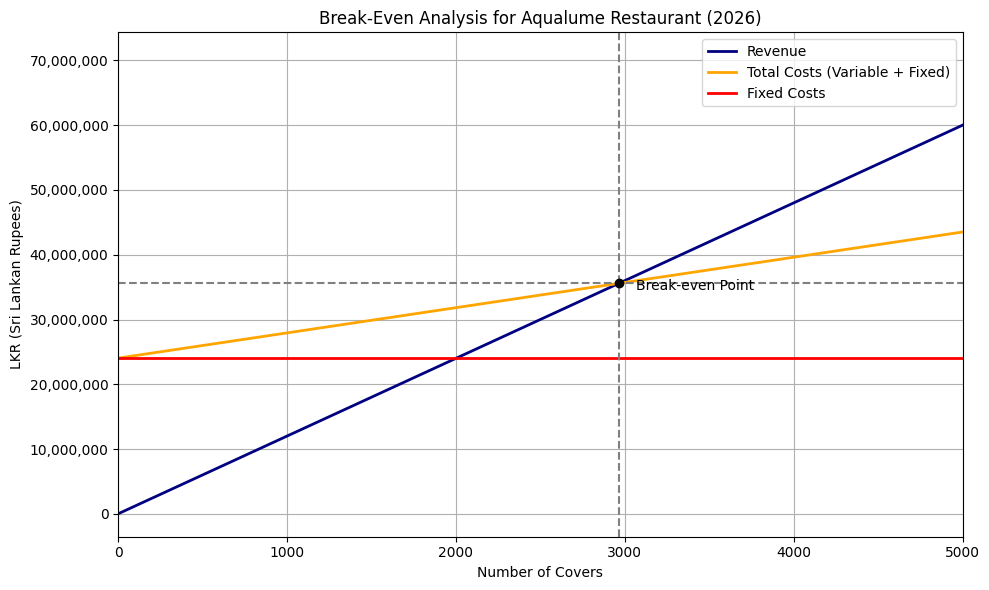

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Year-specific values (e.g., 2026)
selling_price = 12000  # LKR per cover
variable_cost_per_unit = 3894  # LKR
fixed_costs = 24036316  # LKR

# Covers (units)
units = np.arange(0, 6000, 100)

# Revenue and Cost lines
revenue = selling_price * units
total_costs = fixed_costs + variable_cost_per_unit * units
fixed_cost_line = np.full_like(units, fixed_costs)

# Break-even point
break_even_units = fixed_costs / (selling_price - variable_cost_per_unit)
break_even_revenue = selling_price * break_even_units

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(units, revenue, label="Revenue", color="navy", linewidth=2)
plt.plot(units, total_costs, label="Total Costs (Variable + Fixed)", color="orange", linewidth=2)
plt.plot(units, fixed_cost_line, label="Fixed Costs", color="red", linewidth=2)

# Break-even marker
plt.axvline(x=break_even_units, color='gray', linestyle='--')
plt.axhline(y=break_even_revenue, color='gray', linestyle='--')
plt.scatter(break_even_units, break_even_revenue, color='black', zorder=5)
plt.text(break_even_units + 100, break_even_revenue - 1e6, "Break-even Point", fontsize=10)

# Axis formatting
plt.xlim(0, 5000)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))  # Format Y-axis with commas

# Labels and title
plt.title("Break-Even Analysis for Aqualume Restaurant (2026)")
plt.xlabel("Number of Covers")
plt.ylabel("LKR (Sri Lankan Rupees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Saved: break_even_actual_covers_line.png


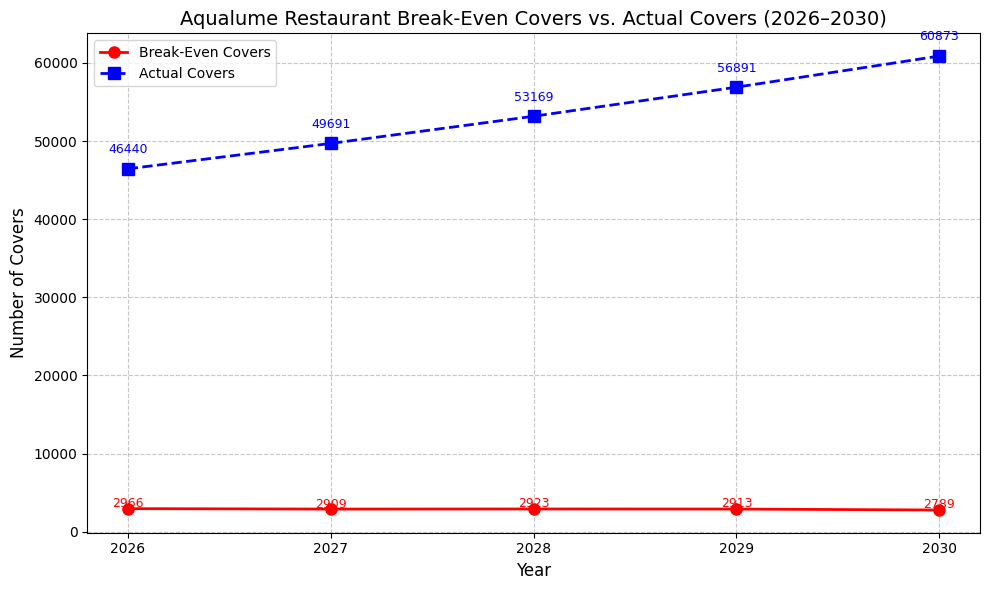

Saved: break_even_actual_revenue_bar.png


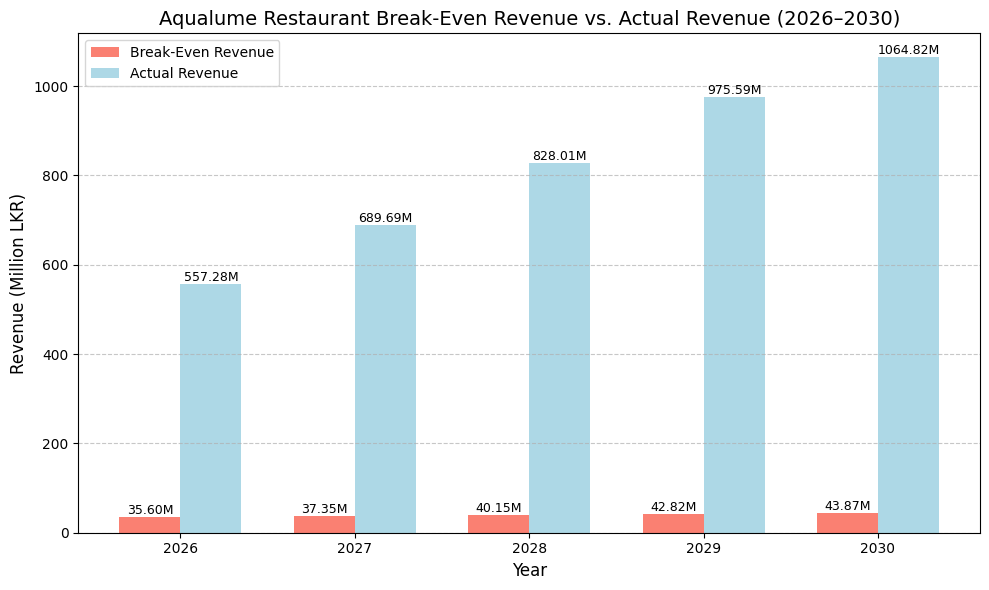

Saved: contribution_margin_fixed_costs_area.png


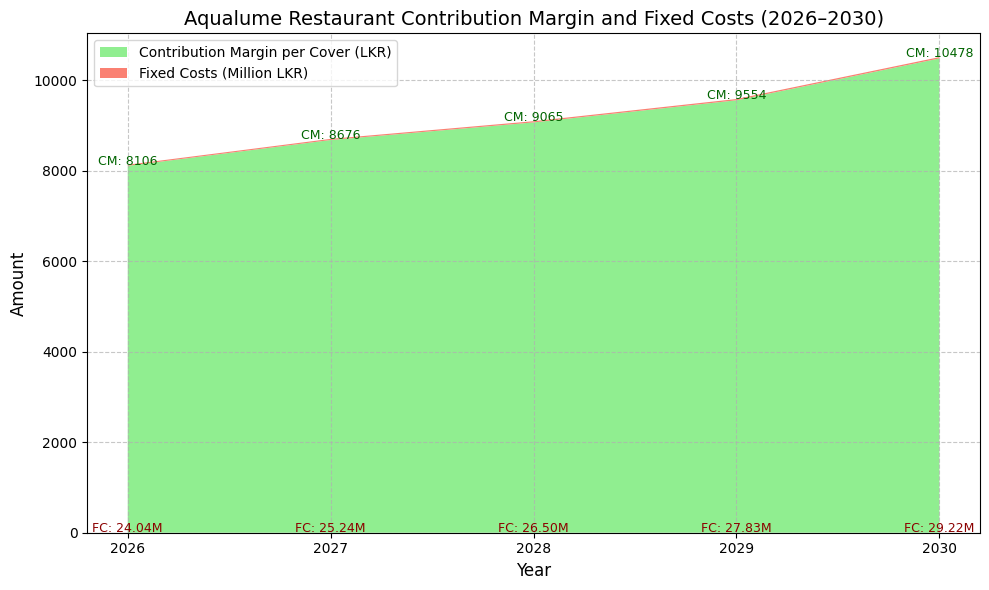

Saved: safety_margin_line.png


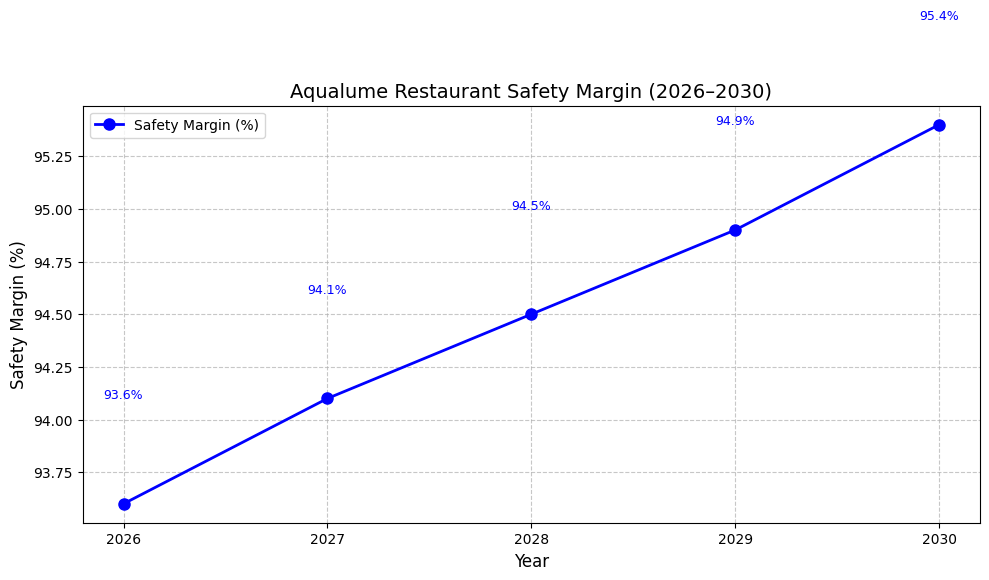

In [8]:
import matplotlib.pyplot as plt
import numpy as numpy
import os

# Data from the break-even analysis report
years = [2026, 2027, 2028, 2029, 2030]
fixed_costs = [24036316, 25238132, 26500039, 27825041, 29216293]  # Fixed Costs in LKR
selling_price_per_unit = [12000, 12840, 13738, 14699, 15727]  # Selling Price per Cover (LKR)
variable_cost_per_unit = [3894, 4164, 4673, 5145, 5249]  # Variable Cost per Cover (LKR)
contribution_margin = [8106, 8676, 9065, 9554, 10478]  # Contribution Margin (LKR)
break_even_covers = [2966, 2909, 2923, 2913, 2789]  # Break-Even Point (Units)
actual_covers = [46440, 49691, 53169, 56891, 60873]  # Actual Covers Sold
break_even_revenue = [35595952, 37347560, 40151774, 42824387, 43865803]  # Break-Even Revenue (LKR)
actual_revenue = [557280000, 689688000, 828011232, 975586368, 1064821524]  # Actual Revenue (LKR)
safety_margin = [93.6, 94.1, 94.5, 94.9, 95.4]  # Safety Margin (%)

# Convert to millions for readability where applicable
fixed_costs_millions = [val / 1_000_000 for val in fixed_costs]
break_even_revenue_millions = [val / 1_000_000 for val in break_even_revenue]
actual_revenue_millions = [val / 1_000_000 for val in actual_revenue]

# Ensure output directory exists
output_dir = "Break_Even"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot 1: Line Chart for Break-Even Covers and Actual Covers
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, break_even_covers, marker='o', linestyle='-', color='r', linewidth=2, markersize=8, label='Break-Even Covers')
ax.plot(years, actual_covers, marker='s', linestyle='--', color='b', linewidth=2, markersize=8, label='Actual Covers')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Covers', fontsize=12)
ax.set_title('Aqualume Restaurant Break-Even Covers vs. Actual Covers (2026–2030)', fontsize=14)
ax.set_xticks(years)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()
for i, (year, be_covers, act_covers) in enumerate(zip(years, break_even_covers, actual_covers)):
    ax.text(year, be_covers + 200, f'{be_covers}', ha='center', fontsize=9, color='r')
    ax.text(year, act_covers + 2000, f'{act_covers}', ha='center', fontsize=9, color='b')
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'break_even_actual_covers_line.png'), dpi=300, bbox_inches='tight')
    print("Saved: break_even_actual_covers_line.png")
except Exception as e:
    print(f"Error saving break_even_actual_covers_line.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 2: Bar Chart for Break-Even Revenue vs. Actual Revenue
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = numpy.arange(len(years))
bars1 = ax.bar(index - bar_width/2, break_even_revenue_millions, bar_width, label='Break-Even Revenue', color='salmon')
bars2 = ax.bar(index + bar_width/2, actual_revenue_millions, bar_width, label='Actual Revenue', color='lightblue')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Revenue (Million LKR)', fontsize=12)
ax.set_title('Aqualume Restaurant Break-Even Revenue vs. Actual Revenue (2026–2030)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}M', 
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'break_even_actual_revenue_bar.png'), dpi=300, bbox_inches='tight')
    print("Saved: break_even_actual_revenue_bar.png")
except Exception as e:
    print(f"Error saving break_even_actual_revenue_bar.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 3: Area Chart for Contribution Margin and Fixed Costs
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(years, 
             contribution_margin, 
             fixed_costs_millions,
             labels=['Contribution Margin per Cover (LKR)', 'Fixed Costs (Million LKR)'],
             colors=['lightgreen', 'salmon'])
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Amount', fontsize=12)
ax.set_title('Aqualume Restaurant Contribution Margin and Fixed Costs (2026–2030)', fontsize=14)
ax.set_xticks(years)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left')
for i, (year, cm, fc) in enumerate(zip(years, contribution_margin, fixed_costs_millions)):
    ax.text(year, cm + fc, f'CM: {cm:.0f}', ha='center', fontsize=9, color='darkgreen')
    ax.text(year, fc/2, f'FC: {fc:.2f}M', ha='center', fontsize=9, color='darkred')
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'contribution_margin_fixed_costs_area.png'), dpi=300, bbox_inches='tight')
    print("Saved: contribution_margin_fixed_costs_area.png")
except Exception as e:
    print(f"Error saving contribution_margin_fixed_costs_area.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Plot 4: Line Chart for Safety Margin Percentage
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, safety_margin, marker='o', linestyle='-', color='b', linewidth=2, markersize=8, label='Safety Margin (%)')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Safety Margin (%)', fontsize=12)
ax.set_title('Aqualume Restaurant Safety Margin (2026–2030)', fontsize=14)
ax.set_xticks(years)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()
for i, (year, sm) in enumerate(zip(years, safety_margin)):
    ax.text(year, sm + 0.5, f'{sm:.1f}%', ha='center', fontsize=9, color='b')
plt.tight_layout()
try:
    plt.savefig(os.path.join(output_dir, 'safety_margin_line.png'), dpi=300, bbox_inches='tight')
    print("Saved: safety_margin_line.png")
except Exception as e:
    print(f"Error saving safety_margin_line.png: {e}")
plt.pause(0.1)
plt.show()
plt.close()

# Download zip folder

In [9]:
import os

# List all files and folders in /kaggle/working
print(os.listdir('/kaggle/working'))


['cost_breakdown_bar.png', 'Balance_Sheet', 'revenue_occupancy_bar.png', 'occupancy_rate_line.png', 'P&L', 'cost_breakdown_pie.png', 'sales_forecast_line.png', '__notebook__.ipynb', 'Break_Even', 'cash_flow', 'seasonal_covers_bar.png']


In [10]:
import zipfile
import os

zip_path = '/kaggle/working/all_pngs.zip'
working_dir = '/kaggle/working/'

with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk(working_dir):
        for file in files:
            if file.endswith('.png'):
                full_path = os.path.join(root, file)
                # Store with relative path for folder structure inside zip
                rel_path = os.path.relpath(full_path, working_dir)
                zipf.write(full_path, arcname=rel_path)

print("✅ All PNG files zipped successfully into all_pngs.zip!")


✅ All PNG files zipped successfully into all_pngs.zip!
